<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-18 21:17:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  65.7MB/s    in 3.1s    

2025-07-18 21:17:35 (65.7 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


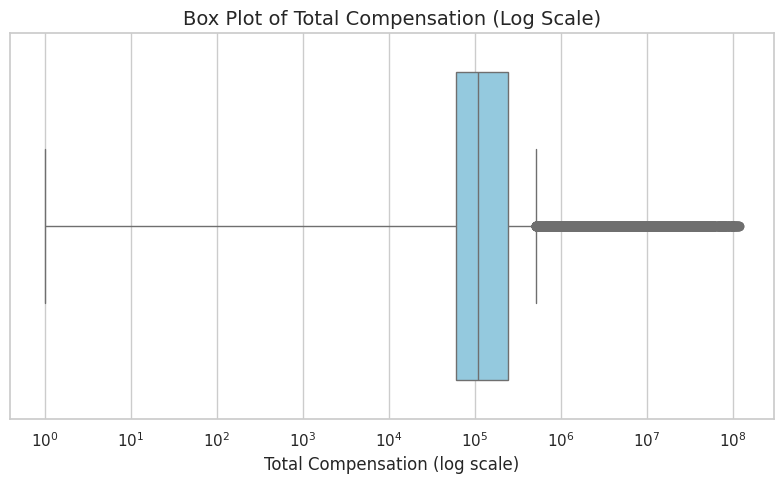

In [17]:
# your code goes here
QUERY = """
SELECT CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df = df.dropna(subset=['CompTotal'])
df = df[df['CompTotal'] > 0]
upper_cap = df['CompTotal'].quantile(0.99)
df = df[df['CompTotal'] < upper_cap]

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['CompTotal'], color='skyblue', patch_artist=True)
plt.xscale('log')
plt.title('Box Plot of Total Compensation (Log Scale)', fontsize=14)
plt.xlabel('Total Compensation (log scale)')
plt.tight_layout()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


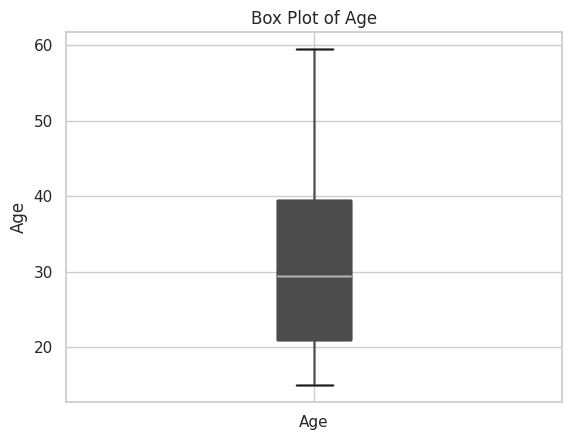

In [21]:
## Write your code here
QUERY = " SELECT Age FROM Main"

def map_age_range(age_str):
    if pd.isnull(age_str):
        return None
    elif 'Under 18' in age_str:
        return 15
    elif '18-24' in age_str:
        return 21
    elif '25-34' in age_str:
        return 29.5
    elif '35-44' in age_str:
        return 39.5
    elif '45-54' in age_str:
        return 49.5
    elif '55-64' in age_str:
        return 59.5
    elif '65 or older' in age_str or '65+' in age_str:
        return 67.5
    else:
        return None
        
df= pd.read_sql_query(QUERY, conn)
df['AgeNumeric'] = df['Age'].apply(map_age_range)

df.boxplot(column='AgeNumeric',vert=True, patch_artist=True)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.xticks([1], ['Age'])
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


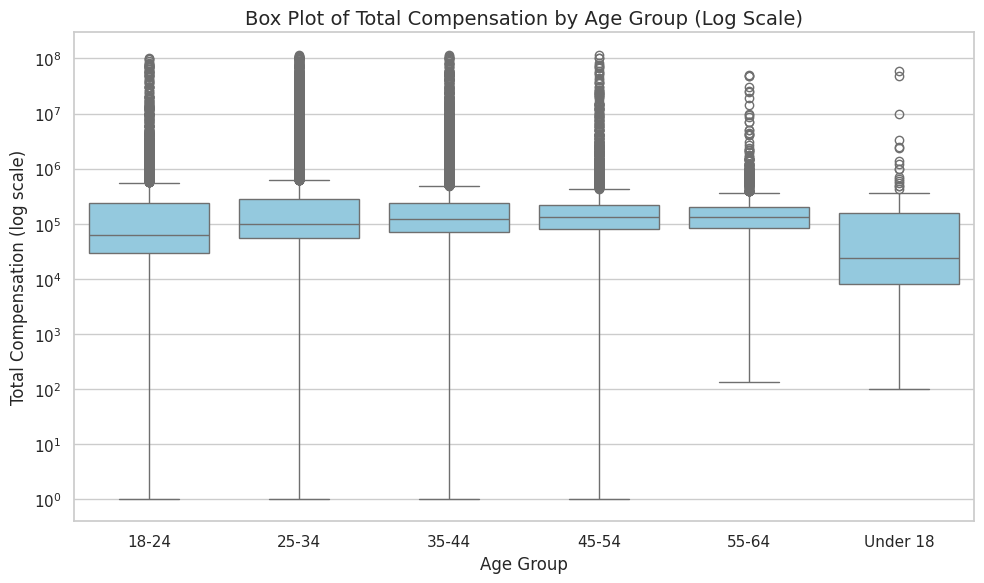

In [24]:
# your code goes here
QUERY = """
SELECT CompTotal, Age
FROM main
"""

def map_age_range(age_str):
    if pd.isnull(age_str):
        return None
    elif 'Under 18' in age_str:
        return 'Under 18'
    elif '18-24' in age_str:
        return '18-24'
    elif '25-34' in age_str:
        return '25-34'
    elif '35-44' in age_str:
        return '35-44'
    elif '45-54' in age_str:
        return '45-54'
    elif '55-64' in age_str:
        return '55-64'
    elif '65 or older' in age_str or '65+' in age_str:
        return '65+'
    else:
        return None

df = pd.read_sql_query(QUERY, conn)
df['AgeGroup'] = df['Age'].apply(map_age_range)
df = df.dropna(subset=['CompTotal', 'AgeGroup'])
df = df[df['CompTotal'] > 0]
upper_cap = df['CompTotal'].quantile(0.99)
df = df[df['CompTotal'] < upper_cap]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='CompTotal', color='skyblue')
plt.yscale('log')
plt.ylabel('Total Compensation (log scale)')
plt.xlabel('Age Group')
plt.title('Box Plot of Total Compensation by Age Group (Log Scale)', fontsize=14)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


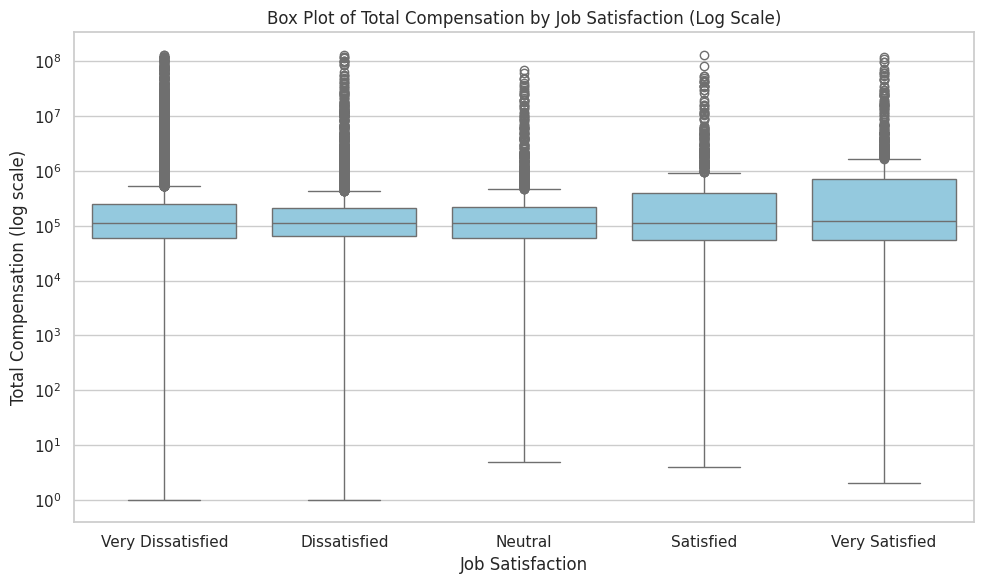

In [66]:
# your code goes here
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main
"""
df = pd.read_sql_query(QUERY, conn)


bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df['JobSatCategory'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

df = df.dropna(subset=['CompTotal', 'JobSatCategory'])
df = df[df['CompTotal'] > 0]
upper_cap = df['CompTotal'].quantile(0.99)
df = df[df['CompTotal'] < upper_cap]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobSatCategory', y='CompTotal', color='skyblue')
plt.yscale('log')
plt.ylabel('Total Compensation (log scale)')
plt.xlabel('Job Satisfaction')
plt.title('Box Plot of Total Compensation by Job Satisfaction (Log Scale)')
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [37]:
from collections import Counter

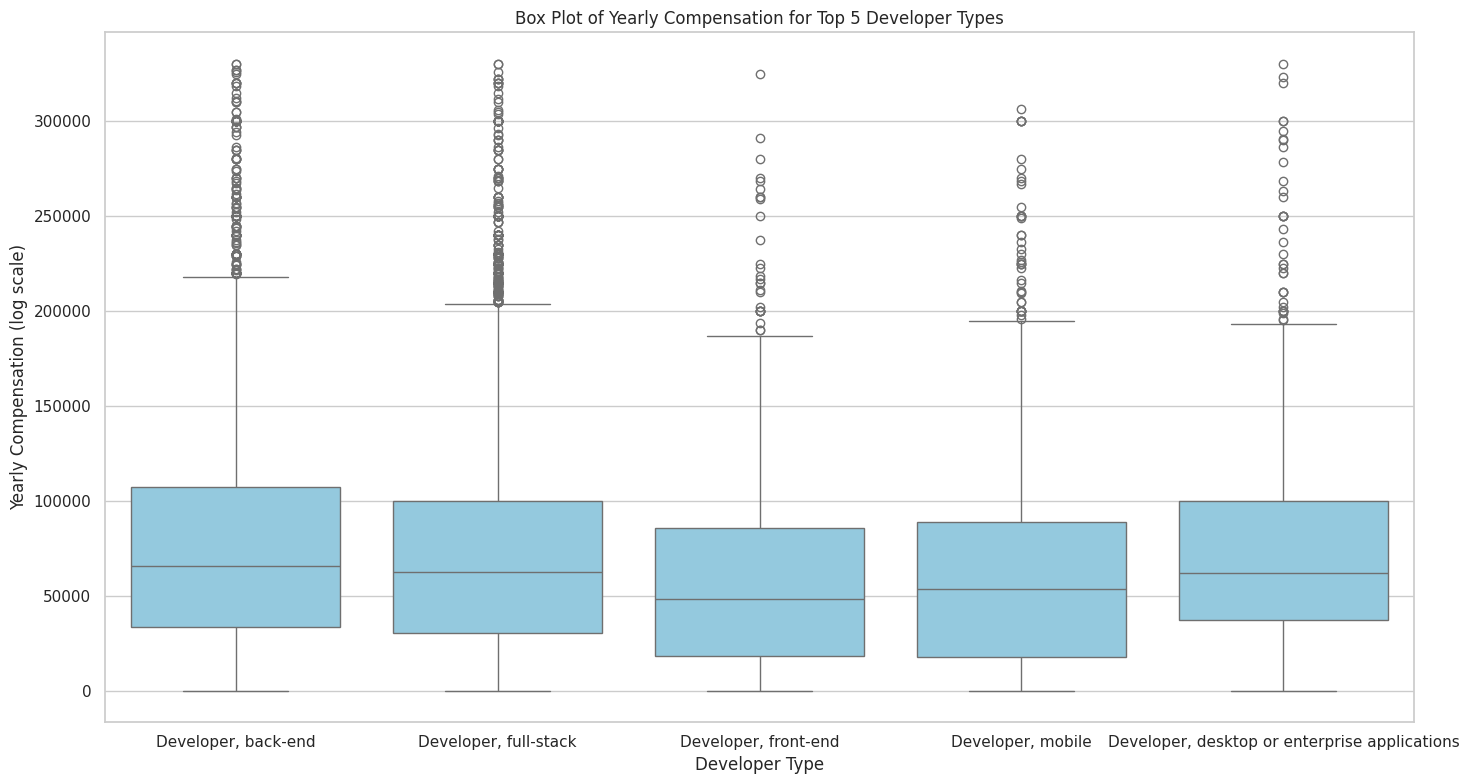

In [72]:
# your code goes here
QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df = df.dropna(subset=['ConvertedCompYearly', 'DevType'])
df = df[df['ConvertedCompYearly'] > 0]


all_roles = df['DevType'].str.split(';').explode()
top5_roles = [role for role, count in Counter(all_roles).most_common(5)]
df_exploded = df.copy()
df_exploded['DevType'] = df_exploded['DevType'].str.split(';')
df_exploded = df_exploded.explode('DevType')
df_exploded['DevType'] = df_exploded['DevType'].str.strip()
df_top5 = df_exploded[df_exploded['DevType'].isin(top5_roles)]

upper_cap = df_top5['ConvertedCompYearly'].quantile(0.99)
df_top5 = df_top5[df_top5['ConvertedCompYearly'] < upper_cap]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top5, x='DevType', y='ConvertedCompYearly', color='skyblue')
#plt.yscale('log')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (log scale)')
plt.title('Box Plot of Yearly Compensation for Top 5 Developer Types')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


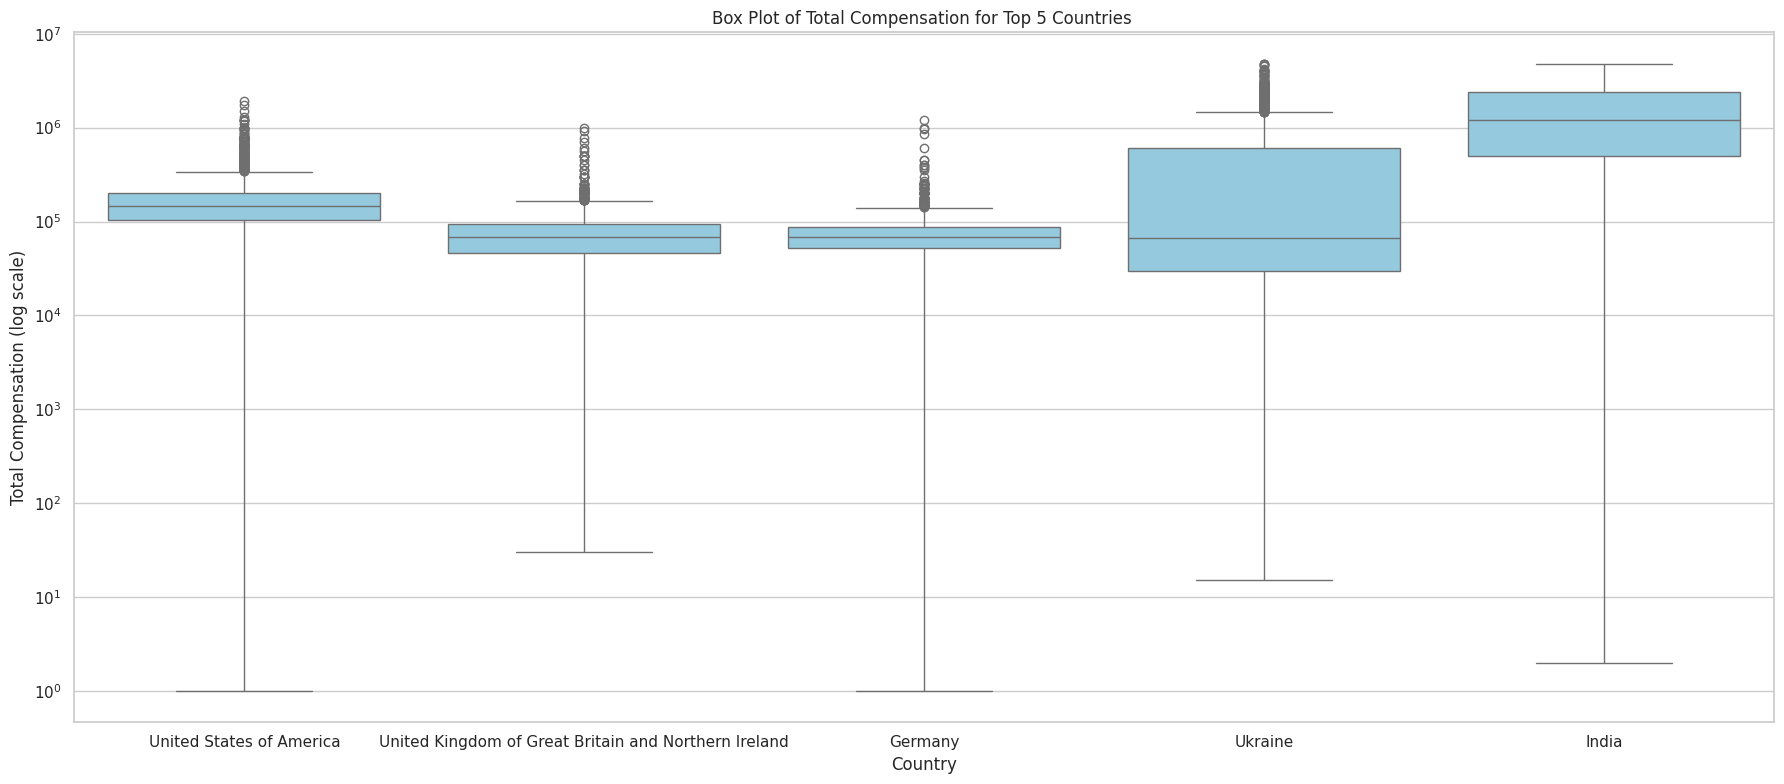

In [45]:
# your code goes here
QUERY = """
SELECT CompTotal, Country
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df = df.dropna(subset=['CompTotal', 'Country'])
df = df[df['CompTotal'] > 0]



all_countries = df['Country'].str.split(';').explode()
top5_countries = [country for country, count in Counter(all_countries).most_common(5)]

df_exploded = df.copy()
df_exploded['Country'] = df_exploded['Country'].str.split(';')
df_exploded = df_exploded.explode('Country')
df_exploded['Country'] = df_exploded['Country'].str.strip()

df_top5 = df_exploded[df_exploded['Country'].isin(top5_countries)]

upper_cap = df_top5['CompTotal'].quantile(0.99)
df_top5 = df_top5[df_top5['CompTotal'] < upper_cap]


plt.figure(figsize=(18, 8))
sns.boxplot(data=df_top5, x='Country', y='CompTotal', color='skyblue')
plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Total Compensation (log scale)')
plt.title('Box Plot of Total Compensation for Top 5 Countries ')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


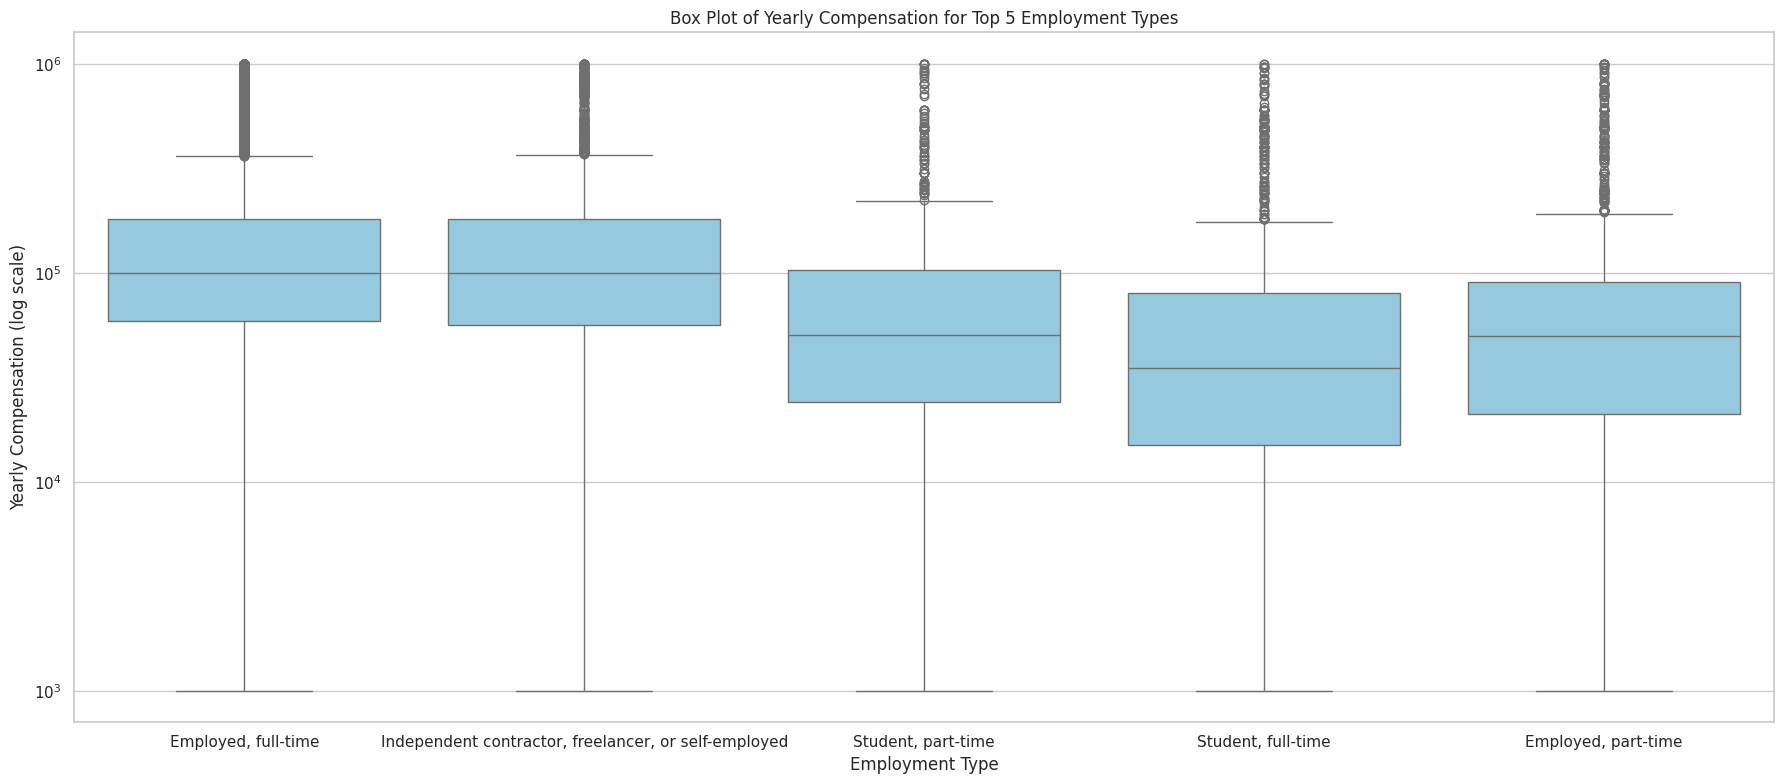

In [71]:
# your code goes here
QUERY = """
SELECT CompTotal, Employment
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df = df.dropna(subset=['CompTotal', 'Employment'])

df['Employment'] = df['Employment'].str.split(';')
df_exploded = df.explode('Employment')
df_exploded['Employment'] = df_exploded['Employment'].str.strip()

df_exploded = df_exploded[(df_exploded['CompTotal'] >= 1_000) & (df_exploded['CompTotal'] <= 1_000_000)]

top5 = df_exploded['Employment'].value_counts().nlargest(5).index
df_top5 = df_exploded[df_exploded['Employment'].isin(top5)]

plt.figure(figsize=(18, 8))
sns.boxplot(data=df_top5, x='Employment', y='CompTotal', color='skyblue')
plt.yscale('log')
plt.xlabel('Employment Type')
plt.ylabel('Yearly Compensation (log scale)')
plt.title('Box Plot of Yearly Compensation for Top 5 Employment Types')
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


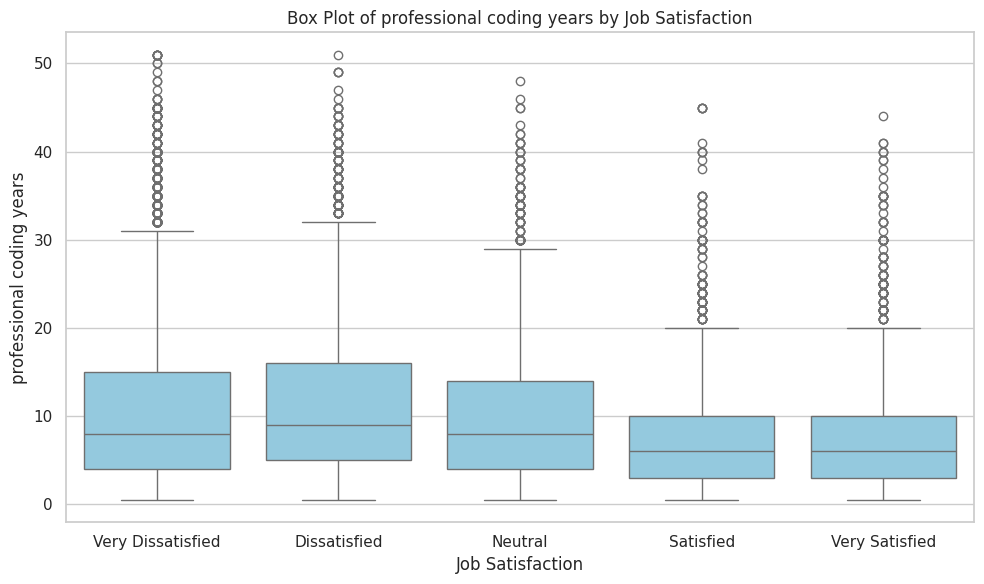

In [69]:
# your code goes here
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
def convert_years_code(value):
    if isinstance(value, str):
        value = value.strip()
        if value == 'Less than 1 year':
            return 0.5
        elif value == 'More than 50 years':
            return 51
        try:
            return float(value)
        except:
            return None
    return value

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_code)

bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
df['JobSatCategory'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

df = df.dropna(subset=['YearsCodePro', 'JobSatCategory'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobSatCategory', y='YearsCodePro', color='skyblue')
plt.ylabel('professional coding years')
plt.xlabel('Job Satisfaction')
plt.title('Box Plot of professional coding years by Job Satisfaction')
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
